In [1]:
from sklearn.datasets import fetch_openml

bike_sharing = fetch_openml(
    "Bike_Sharing_Demand", version=2, as_frame=True, parser="pandas"
)
df = bike_sharing.frame

In [4]:
import modin.pandas as pd
df = pd.DataFrame(df)

To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init(runtime_env={'env_vars': {'__MODIN_AUTOIMPORT_PANDAS__': '1'}})

2023-02-09 09:18:30,339	INFO worker.py:1529 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


In [5]:
type(df)

modin.pandas.dataframe.DataFrame

In [25]:
df.shape

(17379, 13)

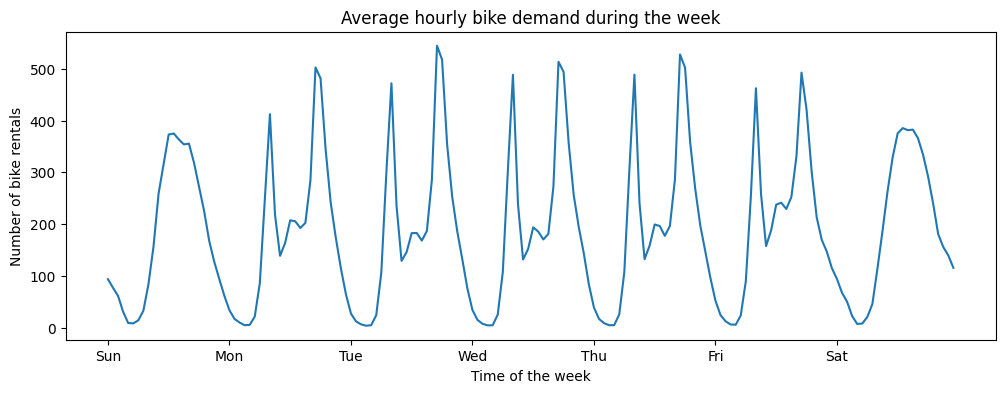

In [6]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 4))
average_week_demand = df.groupby(["weekday", "hour"])["count"].mean()
average_week_demand.plot(ax=ax)
_ = ax.set(
    title="Average hourly bike demand during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xlabel="Time of the week",
    ylabel="Number of bike rentals",
)

In [7]:
df["count"].max()

977

In [8]:
y = df["count"] / df["count"].max()

Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.


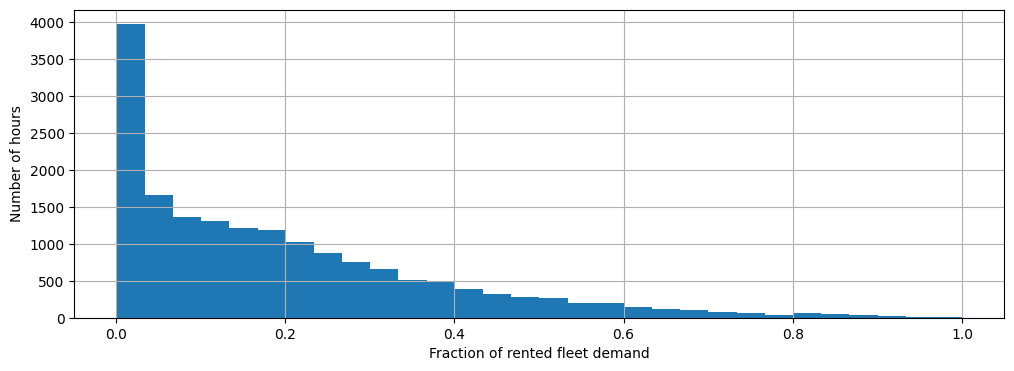

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))
y.hist(bins=30, ax=ax)
_ = ax.set(
    xlabel="Fraction of rented fleet demand",
    ylabel="Number of hours",
)

In [10]:
X = df.drop("count", axis="columns")
X

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
0,spring,0,1,0,False,6,False,clear,9.84,14.395,0.81,0.0000
1,spring,0,1,1,False,6,False,clear,9.02,13.635,0.80,0.0000
2,spring,0,1,2,False,6,False,clear,9.02,13.635,0.80,0.0000
3,spring,0,1,3,False,6,False,clear,9.84,14.395,0.75,0.0000
4,spring,0,1,4,False,6,False,clear,9.84,14.395,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,1,12,19,False,1,True,misty,10.66,12.880,0.60,11.0014
17375,spring,1,12,20,False,1,True,misty,10.66,12.880,0.60,11.0014
17376,spring,1,12,21,False,1,True,clear,10.66,12.880,0.60,11.0014
17377,spring,1,12,22,False,1,True,clear,10.66,13.635,0.56,8.9981


In [11]:
X["weather"].value_counts()

clear         11413
misty          4544
rain           1419
heavy_rain        3
Name: weather, dtype: int64

In [12]:
X["weather"].replace(to_replace="heavy_rain", value="rain", inplace=True)

In [13]:
X["weather"].value_counts()

clear    11413
misty     4544
rain      1422
Name: weather, dtype: int64

In [14]:
X["season"].value_counts()

fall      4496
summer    4409
spring    4242
winter    4232
Name: season, dtype: int64

In [15]:
from sklearn.model_selection import TimeSeriesSplit

ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=48,
    max_train_size=10000,
    test_size=1000,
)

In [16]:
all_splits = list(ts_cv.split(X, y))
train_0, test_0 = all_splits[0]

In [17]:
X.iloc[test_0]

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
12379,summer,1,6,0,False,2,True,clear,22.14,25.760,0.68,27.9993
12380,summer,1,6,1,False,2,True,misty,21.32,25.000,0.77,22.0028
12381,summer,1,6,2,False,2,True,rain,21.32,25.000,0.72,19.9995
12382,summer,1,6,3,False,2,True,rain,20.50,24.240,0.82,12.9980
12383,summer,1,6,4,False,2,True,rain,20.50,24.240,0.82,12.9980
...,...,...,...,...,...,...,...,...,...,...,...,...
13374,fall,1,7,11,False,1,True,clear,34.44,40.150,0.53,15.0013
13375,fall,1,7,12,False,1,True,clear,34.44,39.395,0.49,8.9981
13376,fall,1,7,13,False,1,True,clear,34.44,39.395,0.49,19.0012
13377,fall,1,7,14,False,1,True,clear,36.08,40.910,0.42,7.0015


In [18]:
X.iloc[train_0]

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
2331,summer,0,4,1,False,2,True,misty,25.42,31.060,0.50,6.0032
2332,summer,0,4,2,False,2,True,misty,24.60,31.060,0.53,8.9981
2333,summer,0,4,3,False,2,True,misty,23.78,27.275,0.56,8.9981
2334,summer,0,4,4,False,2,True,misty,22.96,26.515,0.64,8.9981
2335,summer,0,4,5,False,2,True,misty,22.14,25.760,0.68,8.9981
...,...,...,...,...,...,...,...,...,...,...,...,...
12326,summer,1,6,19,False,6,False,clear,26.24,31.060,0.36,11.0014
12327,summer,1,6,20,False,6,False,clear,25.42,31.060,0.35,19.0012
12328,summer,1,6,21,False,6,False,clear,24.60,31.060,0.40,7.0015
12329,summer,1,6,22,False,6,False,clear,23.78,27.275,0.46,8.9981


In [19]:
train_4, test_4 = all_splits[4]

In [20]:
X.iloc[test_4]

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
16379,winter,1,11,5,False,2,True,misty,13.94,16.665,0.66,8.9981
16380,winter,1,11,6,False,2,True,misty,13.94,16.665,0.71,11.0014
16381,winter,1,11,7,False,2,True,clear,13.12,16.665,0.76,6.0032
16382,winter,1,11,8,False,2,True,clear,13.94,16.665,0.71,8.9981
16383,winter,1,11,9,False,2,True,misty,14.76,18.940,0.71,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,1,12,19,False,1,True,misty,10.66,12.880,0.60,11.0014
17375,spring,1,12,20,False,1,True,misty,10.66,12.880,0.60,11.0014
17376,spring,1,12,21,False,1,True,clear,10.66,12.880,0.60,11.0014
17377,spring,1,12,22,False,1,True,clear,10.66,13.635,0.56,8.9981


In [21]:
X.iloc[train_4]

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
6331,winter,0,9,9,False,1,True,misty,26.24,28.790,0.89,12.9980
6332,winter,0,9,10,False,1,True,misty,26.24,28.790,0.89,12.9980
6333,winter,0,9,11,False,1,True,clear,27.88,31.820,0.79,15.0013
6334,winter,0,9,12,False,1,True,misty,27.88,31.820,0.79,11.0014
6335,winter,0,9,13,False,1,True,misty,28.70,33.335,0.74,11.0014
...,...,...,...,...,...,...,...,...,...,...,...,...
16326,winter,1,11,0,False,0,False,misty,12.30,15.150,0.70,11.0014
16327,winter,1,11,1,False,0,False,clear,12.30,14.395,0.70,12.9980
16328,winter,1,11,2,False,0,False,clear,11.48,14.395,0.81,7.0015
16329,winter,1,11,3,False,0,False,misty,12.30,15.150,0.81,11.0014


In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate


categorical_columns = [
    "weather",
    "season",
    "holiday",
    "workingday",
]
categories = [
    ["clear", "misty", "rain"],
    ["spring", "summer", "fall", "winter"],
    ["False", "True"],
    ["False", "True"],
]
ordinal_encoder = OrdinalEncoder(categories=categories)


In [23]:
gbrt_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", ordinal_encoder, categorical_columns),
        ],
        remainder="passthrough",
        # Use short feature names to make it easier to specify the categorical
        # variables in the HistGradientBoostingRegressor in the next
        # step of the pipeline.
        verbose_feature_names_out=False,
    ),
    HistGradientBoostingRegressor(
        categorical_features=categorical_columns,
    ),
).set_output(transform="pandas")

In [27]:
type(X)

modin.pandas.dataframe.DataFrame

In [24]:
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )


evaluate(gbrt_pipeline, X, y, cv=ts_cv)

fit_transform
       season  year  month  hour holiday  weekday workingday weather   temp  \
2331   summer     0      4     1   False        2       True   misty  25.42   
2332   summer     0      4     2   False        2       True   misty  24.60   
2333   summer     0      4     3   False        2       True   misty  23.78   
2334   summer     0      4     4   False        2       True   misty  22.96   
2335   summer     0      4     5   False        2       True   misty  22.14   
...       ...   ...    ...   ...     ...      ...        ...     ...    ...   
12326  summer     1      6    19   False        6      False   clear  26.24   
12327  summer     1      6    20   False        6      False   clear  25.42   
12328  summer     1      6    21   False        6      False   clear  24.60   
12329  summer     1      6    22   False        6      False   clear  23.78   
12330  summer     1      6    23   False        6      False   clear  22.96   

       feel_temp  humidity  windspeed

[0.01330604 0.01432958 0.00102354 ... 0.3234391  0.23336745 0.24360287]
['clear' 'misty' 'rain' 'rain' 'rain' 'rain' 'clear' 'clear' 'misty'
 'misty' 'misty' 'misty' 'misty' 'misty' 'misty' 'misty' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'rain' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 

[0.03480041 0.02047083 0.00818833 0.00511771 0.00511771 0.03684749
 0.18833163 0.58239509 0.72671443 0.34288639 0.1801433  0.23234391
 0.25281474 0.27328557 0.28249744 0.27840328 0.48413511 0.87001024
 0.80859775 0.52507677 0.4247697  0.28966223 0.1975435  0.11566018
 0.05015353 0.02763562 0.01125896 0.00818833 0.01023541 0.03889458
 0.17604913 0.55987718 0.68372569 0.31013306 0.20777892 0.23132037
 0.32241556 0.31013306 0.30910952 0.30706244 0.46264074 0.74104401
 0.80040942 0.5506653  0.41760491 0.30501535 0.25383828 0.1258956
 0.06038895 0.02251791 0.0122825  0.00511771 0.00614125 0.03480041
 0.17400205 0.5383828  0.69703173 0.34493347 0.21494371 0.24257932
 0.34390993 0.32241556 0.27123849 0.3408393  0.47697032 0.88945752
 0.8321392  0.61617195 0.48925281 0.32036847 0.23336745 0.18116684
 0.07881269 0.0296827  0.01944729 0.00818833 0.01023541 0.0296827
 0.14227226 0.43807574 0.71647902 0.39099284 0.25486182 0.27021494
 0.3776868  0.42579324 0.38178096 0.40634596 0.53531218 0.811668

[0.43909928 0.46366428 0.36642784 ... 0.604913   0.6468782  0.57318321]
['rain' 'rain' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'misty' 'misty' 'misty'
 'misty' 'misty' 'misty' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'rain' 'clear' 'clear' 'misty' 'misty' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'misty' 'clear'
 'clear' 'clear' 'misty' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'rain' 'rain' 'rain' 'rain'
 'clear' 'misty' 'misty' 'misty' 'misty' 'misty' 'misty' 'misty' 'misty'
 'misty' 'rain' 'rain' 'rain' 'rain' 'misty' 'misty' 'misty' 'misty'
 'misty' 'rain' 'rain' 'misty' 'misty' 'rain' 'misty' 'rain' 'rain' 'rain'
 'rain' 'rain' 'misty' 'misty' 'misty' 'rain' 'misty' 'rain' 

[0.395087   0.7727738  0.81269191 0.60900716 0.46468782 0.3357216
 0.29068577 0.16990788 0.0542477  0.02558854 0.00716479 0.00307062
 0.00716479 0.03889458 0.21801433 0.5383828  0.6765609  0.32753327
 0.16274309 0.21084954 0.25997953 0.22620266 0.21903787 0.24974411
 0.38996929 0.78812692 0.790174   0.55987718 0.4370522  0.3408393
 0.24974411 0.16479017 0.0542477  0.01637666 0.00818833 0.00409417
 0.00614125 0.04708291 0.16581372 0.50665302 0.69498465 0.30399181
 0.14124872 0.18730809 0.20675537 0.20777892 0.17400205 0.19856704
 0.22927329 0.37871034 0.65813715 0.52814739 0.37461617 0.32650972
 0.29477994 0.13408393 0.06755374 0.02558854 0.00716479 0.00511771
 0.00818833 0.04094166 0.1555783  0.48413511 0.67246673 0.32548618
 0.20266121 0.22108495 0.28045036 0.25997953 0.20163767 0.2988741
 0.36642784 0.78915046 0.79529171 0.54554759 0.51688843 0.33981576
 0.06960082 0.06653019 0.03480041 0.01125896 0.01944729 0.03684749
 0.00921187 0.04298874 0.12896622 0.36847492 0.70726714 0.3817809

[0.24360287 0.28659161 0.35721597 ... 0.01432958 0.03070624 0.10440123]
['clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'misty' 'misty' 'misty' 'misty' 'misty' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'misty' 'misty' 'misty' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'cl

[0.71545548 0.35005118 0.21084954 0.23439099 0.28966223 0.29477994
 0.2517912  0.28863869 0.45445241 0.86489253 0.85363357 0.58648925
 0.42579324 0.28454452 0.16479017 0.11668373 0.03889458 0.02149437
 0.01535312 0.00409417 0.00818833 0.04298874 0.15046059 0.27533265
 0.70931423 0.40429887 0.20880246 0.22313204 0.30399181 0.29477994
 0.2569089  0.32446264 0.4912999  0.88433982 0.83725691 0.61105425
 0.44524053 0.32139202 0.22108495 0.11156602 0.04810645 0.01432958
 0.00614125 0.00921187 0.01023541 0.04094166 0.185261   0.56704197
 0.82702149 0.35619243 0.18219038 0.25895599 0.36847492 0.30706244
 0.30808598 0.34595701 0.50460594 0.89048106 0.83111566 0.65813715
 0.4370522  0.32036847 0.24053224 0.16069601 0.06653019 0.02354145
 0.0174002  0.00511771 0.00818833 0.03582395 0.16683726 0.54452405
 0.77175026 0.40532242 0.2395087  0.28249744 0.30092119 0.29682702
 0.27942682 0.34595701 0.49334698 0.86386899 0.87308086 0.62436029
 0.48208802 0.31422723 0.29785056 0.1555783  0.0839304  0.0327

[0.01023541 0.00307062 0.00716479 ... 0.27328557 0.27021494 0.17502559]
['clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'misty' 'misty'
 'misty' 'misty' 'misty' 'misty' 'misty' 'misty' 'rain' 'rain' 'misty'
 'misty' 'misty' 'rain' 'misty' 'rain' 'misty' 'misty' 'rain' 'rain'
 'rain' 'rain' 'misty' 'misty' 'clear' 'misty' 'misty' 'misty' 'misty'
 'misty' 'misty' 'misty' 'misty' 'misty' 'misty' 'misty' 'misty' 'misty'
 'misty' 'misty' 'misty' 'misty' 'misty' 'misty' 'misty' 'misty' 'misty'
 'misty' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'misty' 'misty' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'cl

[0.05220061 0.03787103 0.01535312 0.01023541 0.00716479 0.01944729
 0.06038895 0.15762538 0.40634596 0.33981576 0.30501535 0.31525077
 0.34902764 0.41453429 0.42988741 0.37871034 0.38587513 0.5087001
 0.4667349  0.37973388 0.23234391 0.15455476 0.10951894 0.07062436
 0.03172979 0.01330604 0.00716479 0.00307062 0.00716479 0.01944729
 0.14636643 0.37052201 0.72978506 0.39099284 0.1678608  0.1975435
 0.26612078 0.24360287 0.24974411 0.25997953 0.43398158 0.82497441
 0.8024565  0.52610031 0.36847492 0.23029683 0.16581372 0.08597748
 0.03377687 0.00818833 0.00818833 0.00614125 0.00614125 0.04094166
 0.17911975 0.51893552 0.85875128 0.37461617 0.2221085  0.29785056
 0.39918117 0.30399181 0.27737973 0.32650972 0.57932446 0.9703173
 0.86386899 0.57932446 0.40122825 0.27533265 0.20163767 0.13920164
 0.04298874 0.01125896 0.01125896 0.00307062 0.01023541 0.04298874
 0.16274309 0.48925281 0.81678608 0.36335722 0.20880246 0.2569089
 0.33367451 0.29785056 0.35619243 0.47082907 0.49232344 0.84646878

[0.209826   0.15762538 0.16274309 ... 0.07471853 0.04708291 0.0122825 ]
['misty' 'misty' 'clear' 'clear' 'misty' 'misty' 'misty' 'misty' 'misty'
 'misty' 'misty' 'misty' 'misty' 'misty' 'misty' 'misty' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'misty' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'misty' 'misty' 'misty' 'misty' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'misty'
 'misty' 'misty' 'misty' 'misty' 'misty' 'clear' 'clear' 'clear' 'clear'
 'clear' 'clear' 'clear' 'clear' 'clear' 'clear' 'cl